# Análise de dados

## Importar Bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.get_option('display.max_columns', 1000)
pd.set_option('expand_frame_repr', False)

## Importar dados

In [8]:
df = pd.read_csv('prt_esp_indicators.csv')
df.head()

,country,year,population,gdp_per_capita_usd,gdp_growth_pct,unemployment_pct,labor_force_total
0,Portugal,1996,10063945,12185.091401,3.504247,7.298,4863514
1,Portugal,1997,10108977,11575.507112,4.400868,6.571,4958056
2,Portugal,1998,10160196,12199.206385,4.807963,4.640,5119669
3,Portugal,1999,10217828,12475.291770,3.906578,4.579,5168078
4,Portugal,2000,10289898,11526.372067,3.816177,3.806,5230882


## Compreensão dos dados presente na tabela

In [11]:
df.describe()

,year,population,gdp_per_capita_usd,gdp_growth_pct,unemployment_pct,labor_force_total
count,58.000000,5.800000e+01,58.000000,58.000000,58.000000,5.800000e+01
mean,2010.000000,2.762235e+07,22997.315548,1.791934,12.015155,1.349042e+07
std,8.439672,1.748780e+07,6777.954488,3.260762,5.856873,8.440785e+06
min,1996.000000,1.006394e+07,11526.372067,-10.940071,3.806000,4.863514e+06
25%,2003.000000,1.042331e+07,17349.340903,0.768106,7.049000,5.294699e+06
50%,2010.000000,2.529227e+07,23198.878977,2.556995,11.118000,1.120080e+07
75%,2017.000000,4.640746e+07,28447.754493,3.578281,15.500500,2.302208e+07
max,2024.000000,4.884884e+07,35603.248328,6.985841,26.094000,2.460451e+07


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             58 non-null     object 
 1   year                58 non-null     int64  
 2   population          58 non-null     int64  
 3   gdp_per_capita_usd  58 non-null     float64
 4   gdp_growth_pct      58 non-null     float64
 5   unemployment_pct    58 non-null     float64
 6   labor_force_total   58 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 3.3+ KB


In [27]:
#correlação entre indicadores
indicators = ['population', 'gdp_per_capita_usd', 'gdp_growth_pct', 
    'unemployment_pct', 'labor_force_total']

corr_per_country = df.groupby('country')[indicators].corr()
print(corr_per_country)

# View only Portugal's correlations
print("--- Portugal Correlation Matrix ---")
print(corr_per_country.loc['Portugal'])

# View only Spain's correlations
print("\n--- Spain Correlation Matrix ---")
print(corr_per_country.loc['Spain'])

                             population  gdp_per_capita_usd  gdp_growth_pct  unemployment_pct  labor_force_total
country                                                                                                         
Portugal population            1.000000            0.660268       -0.326385          0.292333           0.901757
         gdp_per_capita_usd    0.660268            1.000000       -0.170596          0.367175           0.421248
         gdp_growth_pct       -0.326385           -0.170596        1.000000         -0.431943          -0.313789
         unemployment_pct      0.292333            0.367175       -0.431943          1.000000           0.104068
         labor_force_total     0.901757            0.421248       -0.313789          0.104068           1.000000
Spain    population            1.000000            0.922443       -0.322189          0.109797           0.985557
         gdp_per_capita_usd    0.922443            1.000000       -0.268676         -0.049714   

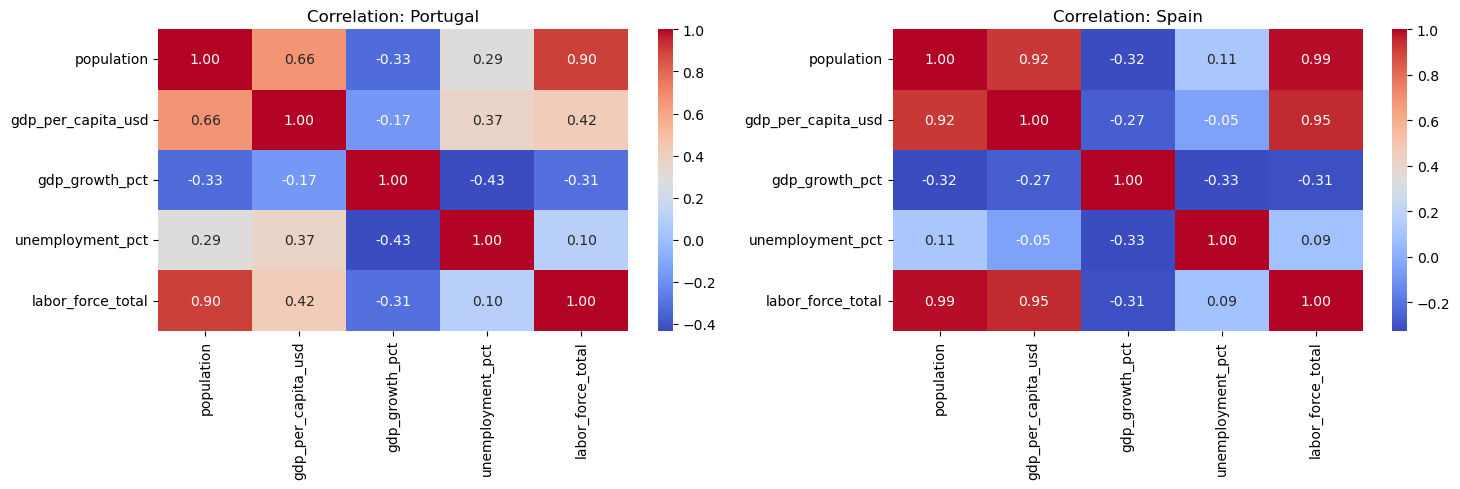

In [ ]:
countries = df['country'].unique()
fig, axes = plt.subplots(1, len(countries), figsize=(15, 5))

for i, country in enumerate(countries):
    # Calculate corr for this country
    country_corr = df[df['country'] == country][indicators].corr()
    
    # Plot heatmap
    sns.heatmap(country_corr, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[i])
    axes[i].set_title(f'Correlation: {country}')

plt.tight_layout()
plt.show()